In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("headbrain.csv")

In [65]:
dataset.shape

(237, 4)

In [3]:
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
X = dataset['Head Size(cm^3)'].values
y = dataset['Brain Weight(grams)'].values

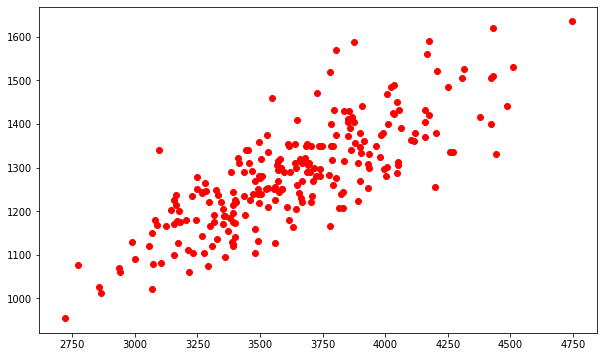

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,c='r')
plt.show()

In [6]:
mean_x = np.mean(X)
mean_y = np.mean(y)

In [7]:
numer = 0
denom = 0

for i in range(len(X)):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
slope = numer / denom
c = mean_y - slope * mean_x

In [8]:
slope,c

(0.26342933948939945, 325.57342104944223)

In [9]:
predictions = []
for i in range(len(X)):
    y_cap = X[i] * slope + c
    predictions.append(y_cap)

In [10]:
print("Actual :")
print(y[:10])
print("Prediction : ")
print(predictions[:10])

Actual :
[1530 1297 1335 1282 1590 1300 1400 1255 1355 1375]
Prediction : 
[1514.1666008256125, 1310.2722920608173, 1448.0458366137732, 1320.546036300904, 1425.9177720966638, 1269.9676031189392, 1322.6534710168191, 1263.118440292215, 1277.3436246246424, 1374.549050896231]


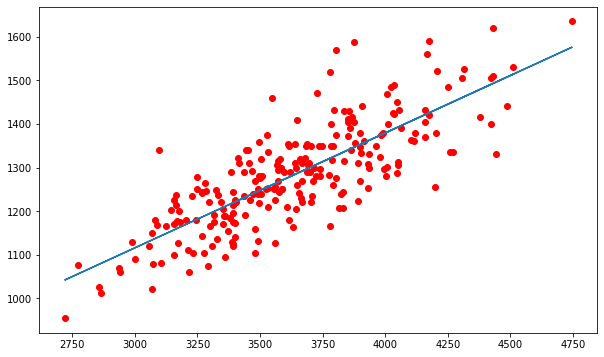

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,c='r')
plt.plot(X,predictions)
plt.show()

In [12]:
# MSE - Mean Squared Error
err = 0
n = len(y)
for i in range(len(y)):
    err += (predictions[i] - y[i]) ** 2

mse = err / n
print("MSE",mse)

MSE 5201.38402800233


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
X = np.reshape(X,(X.shape[0],1))
y = np.reshape(y,(y.shape[0],1))

In [16]:
sc = StandardScaler()
# sc.fit
# sc.transform
X = sc.fit_transform(X)

In [17]:
X[:5]

array([[2.40886829],
       [0.28535333],
       [1.72023489],
       [0.39235214],
       [1.4897759 ]])

In [18]:
y = sc.fit_transform(y)

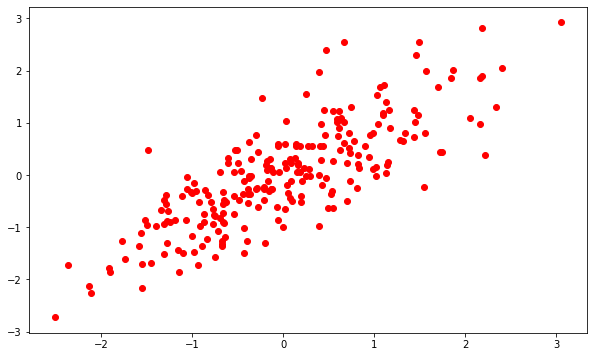

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,c='r')
plt.show()

In [45]:
def gradientDescent(X,y,epochs,learning_rate):
    slope = 0
    intercept = 0
    n = len(X)
    for i in range(epochs):
        y_pred = slope * X + intercept
        loss = y_pred - y
        slope_grad = (2/n) * X.T.dot(loss)
        slope = slope - learning_rate * slope_grad
        intercept_grad = (2/n) * np.sum(loss)
        intercept = intercept - learning_rate * intercept_grad
        
    return slope, intercept

In [76]:
epochs = 10000
learning_rate = 0.01
slope, intercept = gradientDescent(X,y,epochs,learning_rate)

In [33]:
# slope = 0
# intercept = 0

In [34]:
# y_pred.shape
# y.shape

(237, 1)

In [35]:
# y_pred = slope * X + intercept
# loss = y_pred - y

In [36]:
# loss.shape

(237, 1)

In [40]:
# slope_grad = (2/n) * X.T.dot(loss)

In [41]:
# slope_grad.shape

(1, 1)

In [42]:
# slope_grad

array([[-1.59913942]])

In [43]:
# slope_grad = (2/n) * np.dot(X.T, loss)

In [69]:
slope, intercept

(array([[0.69138136]]), -1.8848869956639668e-16)

In [57]:
slope[0][0]

0.7995697079086465

In [77]:
predictions = []
for i in range(len(X)):
    y_cap = X[i] * slope + intercept
    predictions.append(y_cap)

In [78]:
predictions = np.asarray(predictions)

In [79]:
# predictions.shape
predictions = predictions.flatten()

In [80]:
predictions.shape

(237,)

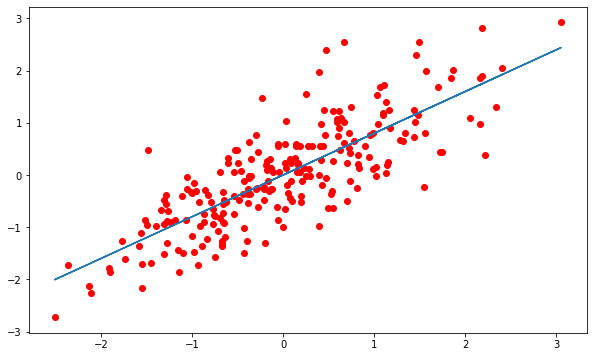

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,c='r')
plt.plot(X,predictions)
plt.show()

In [82]:
# MSE - Mean Squared Error
err = 0
n = len(y)
for i in range(len(y)):
    err += (predictions[i] - y[i]) ** 2

mse = err / n
print("MSE",mse)

MSE [0.36068828]
